<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 2 to 2141
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Регион           1921 non-null   object 
 1   Год              1921 non-null   int64  
 2   Оборот_на_душу   1921 non-null   float64
 3   region_standard  1921 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 75.0+ KB
None

Пропуски по колонкам:
 Регион             0
Год                0
Оборот_на_душу     0
region_standard    0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 22

Статистика оборота на душу:
 count      1921.000000
mean     106071.168142
std       79457.963548
min           0.000000
25%       32717.000000
50%       96377.000000
75%      164472.000000
max      477554.000000
Name: Оборот_на_душу, dtype: float64

Количество дубликатов: 0

Количество выбросов: 8

Топ-5 записей:
          region_standard   Год  Оборот_на_душу
2065              Москва 

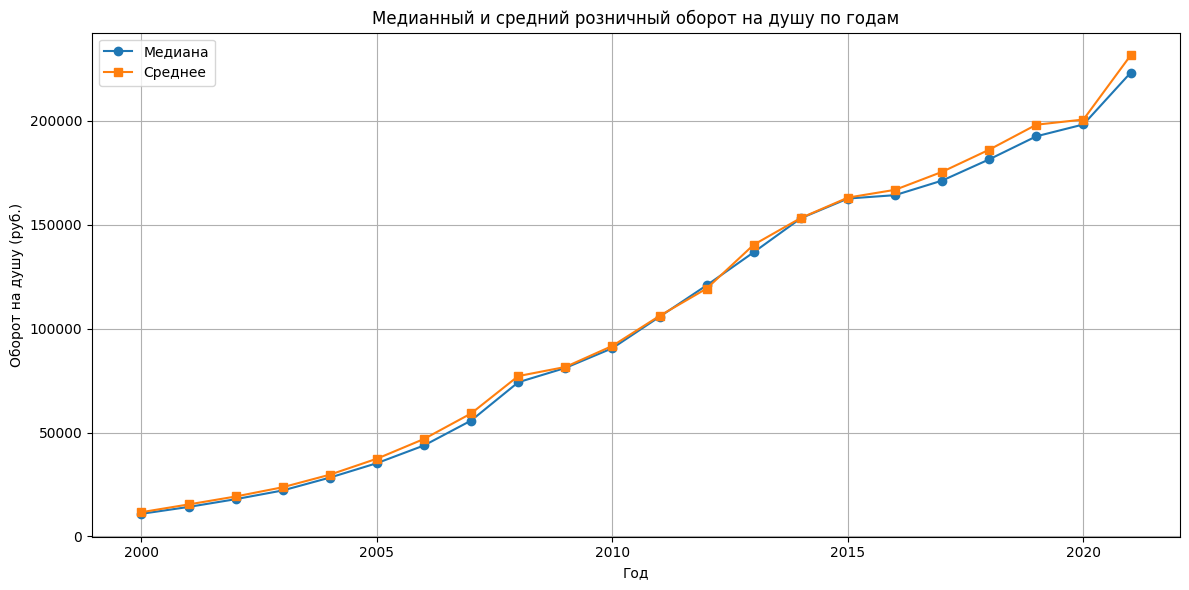

<Figure size 1600x600 with 0 Axes>

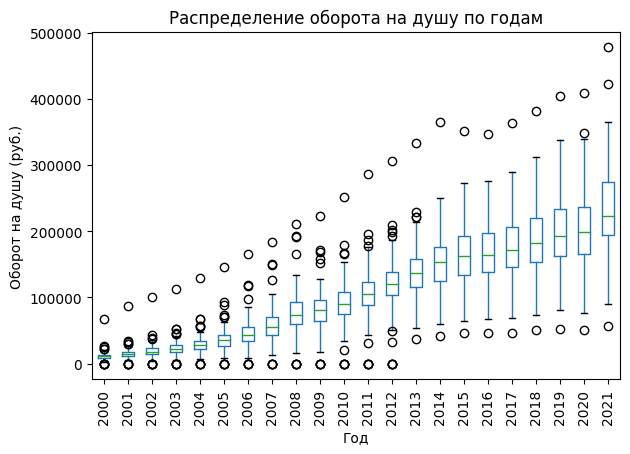

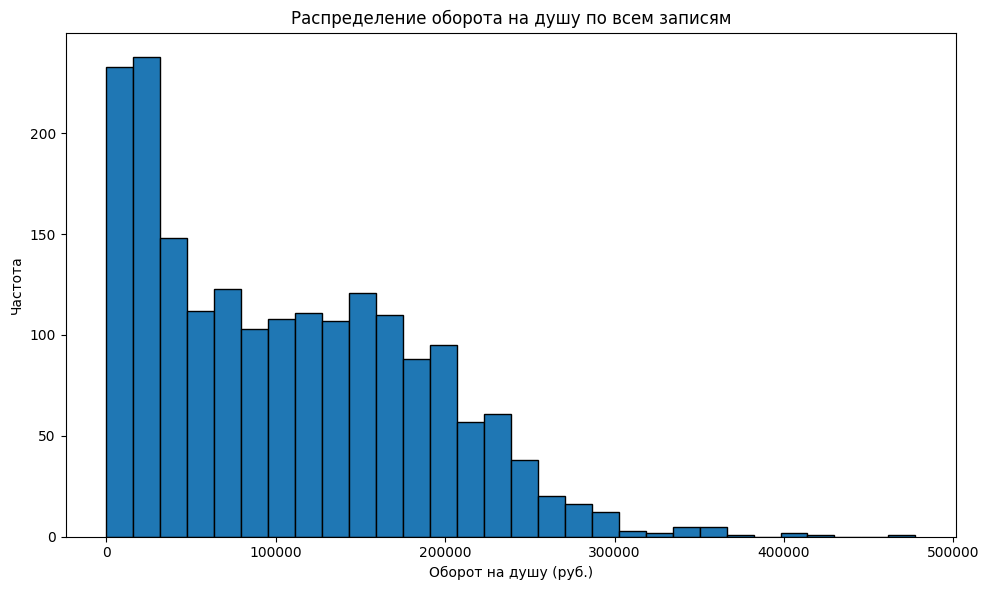

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/retail_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные регионы и годы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["Год"].nunique())

# 5. Статистика по обороту
print("\nСтатистика оборота на душу:\n", df["Оборот_на_душу"].describe())

# 6. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 7. Проверка выбросов через IQR
Q1 = df["Оборот_на_душу"].quantile(0.25)
Q3 = df["Оборот_на_душу"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Оборот_на_душу"] < lower_bound) | (df["Оборот_на_душу"] > upper_bound)]
print("\nКоличество выбросов:", outliers.shape[0])

# 8. Топ-5 по максимальным значениям
top5 = df.sort_values(by="Оборот_на_душу", ascending=False).head(5)
print("\nТоп-5 записей:\n", top5[["region_standard", "Год", "Оборот_на_душу"]])

# 9. Тренды медианы и среднего
median_turnover = df.groupby("Год")["Оборот_на_душу"].median()
mean_turnover = df.groupby("Год")["Оборот_на_душу"].mean()

plt.figure(figsize=(12,6))
plt.plot(median_turnover.index, median_turnover.values, marker="o", label="Медиана")
plt.plot(mean_turnover.index, mean_turnover.values, marker="s", label="Среднее")
plt.title("Медианный и средний розничный оборот на душу по годам")
plt.xlabel("Год")
plt.ylabel("Оборот на душу (руб.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Boxplot по годам
plt.figure(figsize=(16,6))
df.boxplot(column="Оборот_на_душу", by="Год", grid=False, rot=90)
plt.title("Распределение оборота на душу по годам")
plt.suptitle("")
plt.ylabel("Оборот на душу (руб.)")
plt.tight_layout()
plt.show()

# 11. Гистограмма
plt.figure(figsize=(10,6))
plt.hist(df["Оборот_на_душу"], bins=30, edgecolor="black")
plt.title("Распределение оборота на душу по всем записям")
plt.xlabel("Оборот на душу (руб.)")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `retail_standardized.csv`

**Описание данных**
- 1,921 запись по 85 регионам.
- Период: 22 года наблюдений.
- Показатель: среднедушевой розничный товарооборот в рублях.

---

**Типы данных**
- Все признаки корректны:
  - `Год` — int64
  - `Оборот_на_душу` — float64
  - `region_standard` — object

---

**Пропуски**
- Отсутствуют после фильтрации агрегатов.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее: ~106,000 руб.
- Медиана: ~96,000 руб.
- Максимум: ~477,500 руб.
- 75% значений ниже ~164,500 руб.
- Минимум: 0 руб.

---

**Топ-5 региональных значений**
1. Москва (2021) — 477,554 руб.
2. Московская область (2021) — 422,211 руб.
3. Москва (2020) — 408,674 руб.
4. Москва (2019) — 403,426 руб.
5. Москва (2018) — 382,016 руб.

---

**Выбросы**
- Количество выбросов по IQR: 8 записей.
- Все выбросы соответствуют крупным экономическим регионам.
- **Удалять не требуется**, так как данные реалистичны.

---

**Тренды**
- Медианный показатель растёт постепенно.
- Среднее заметно выше медианы из-за Москвы и МО.
- Разрыв увеличивается с течением времени.

---

**Визуализации**
- Boxplot показывает сильное смещение распределения.
- Гистограмма подтверждает, что большая часть регионов до ~160 тыс. руб.
- Линии медианы и среднего иллюстрируют рост.

---

**Вывод**
- Данные готовы для анализа и объединения с другими таблицами.
- При моделировании рекомендуется либо логарифмировать признак


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/retail_AfterEDA.csv", index=False)